In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import os

os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [2]:
file = fits.open("GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")
hlss_data = file[1].data
file.close()

file = fits.open("single_object.fits")
grizli_data = file[0].data
file.close

spec_temp = Table.read("/Users/keith/astr/research_astr/FOV0/FOV0_SEDs/SED:rest:gal.2678.fits", format="fits")

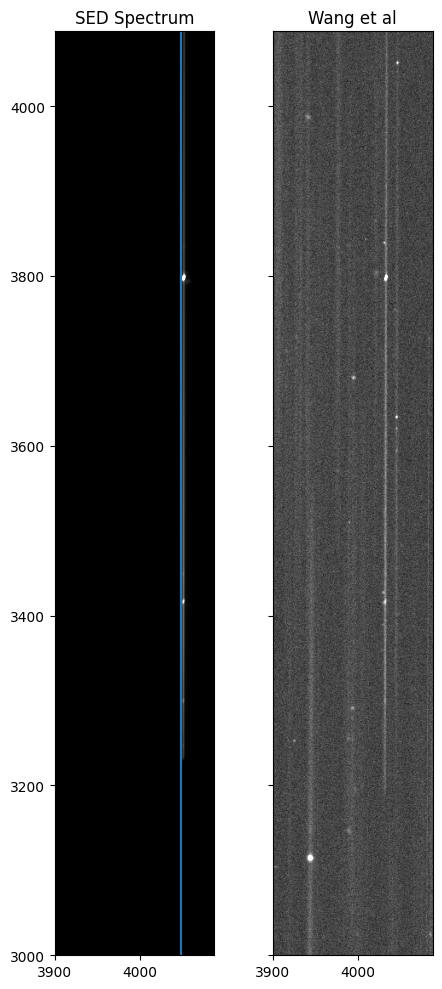

In [3]:
# Display comparison image
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(5,10))

ax2.imshow(grizli_data, origin="lower", cmap='grey', vmax=np.max(grizli_data)/5)
ax2.set_xlim(3900, 4088)
ax2.set_ylim(3000,4088)
ax2.set_title("SED Spectrum")

ax3.imshow(hlss_data, origin="lower", cmap='grey', vmax=np.max(hlss_data)/100)
ax3.set_xlim(3900, 4088)
ax3.set_ylim(3000,4088)
ax3.set_title("Wang et al")
ax3.set_yticklabels([])

ax2.axvline(4048)

fig.tight_layout()

Text(0.5, 1.0, 'Spetrum Template')

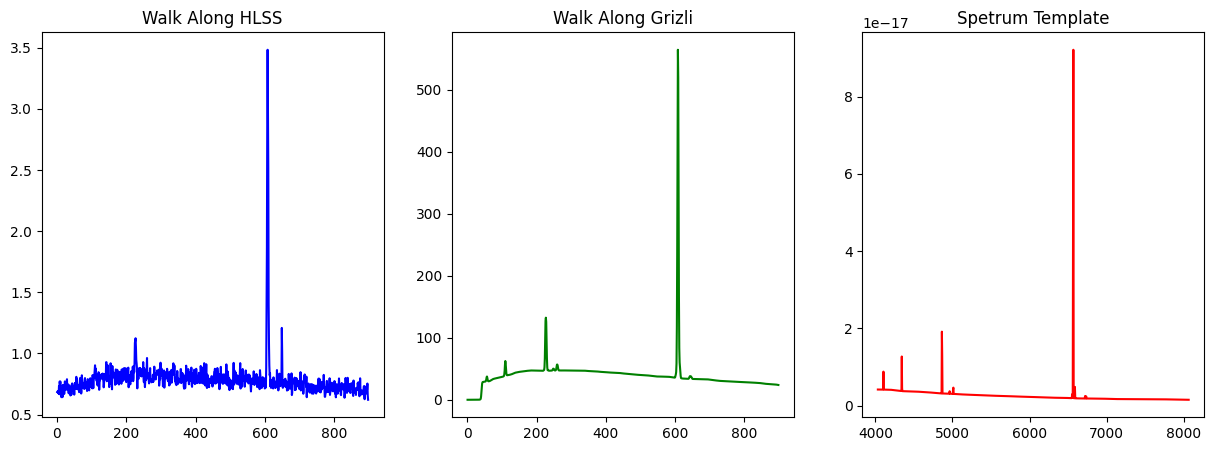

In [4]:
# Walk along HLSS
hlss_cutout = hlss_data[3190:, 4031:4038]
steps = hlss_cutout.shape[0]
hlss_flux = [np.max(hlss_cutout[ii, :])for ii in range(steps)]
x = np.linspace(1, steps, steps)

# Walk along Grizli
grizli_cutout = grizli_data[3190:, 4048:4055]
steps = grizli_cutout.shape[0]
grizli_flux = [np.max(grizli_cutout[ii, :])for ii in range(steps)]
x = np.linspace(1, steps, steps)

# Plot walk along against template
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(x, hlss_flux, c='b')
ax1.set_title("Walk Along HLSS")

ax2.plot(x, grizli_flux, c='g')
ax2.set_title("Walk Along Grizli")

ax3.plot(spec_temp["wavelength"], spec_temp["flux"], c='r')
ax3.set_title("Spetrum Template")